# Figure 1: Mean Squared Error as a function of the samples per site and sites

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../outputs/fig1_5000samples.csv')
df

,Unnamed: 0,error_angle_mean,error_angle_median,error_angle_95,error_angle_std,n_tot,n,k,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers
0,0,4.248736,3.983762,8.350993,2.234435,144,9,16,50,30.0,0.0,0.0,G,NaN,False
1,0,2.483517,2.331589,4.860962,1.299115,270,27,10,50,30.0,0.0,0.0,G,NaN,False
2,0,4.549271,4.263995,8.816016,2.382016,96,8,12,50,30.0,0.0,0.0,G,NaN,False
3,0,4.016487,3.770682,7.787364,2.062967,28,14,2,50,30.0,0.0,0.0,G,NaN,False
4,0,2.983549,2.809561,5.801222,1.547688,171,19,9,50,30.0,0.0,0.0,G,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,0,3.603581,3.384722,6.918465,1.874391,130,13,10,50,30.0,0.0,0.0,G,NaN,False
769,0,6.130004,5.740735,12.077962,3.241103,12,6,2,50,30.0,0.0,0.0,G,NaN,False
770,0,7.280149,6.820685,14.265163,3.840691,120,3,40,50,30.0,0.0,0.0,G,NaN,False
771,0,2.232585,2.090758,4.297815,1.141700,245,35,7,50,30.0,0.0,0.0,G,NaN,False


### Plot Function

In [3]:
from scipy.ndimage.filters import gaussian_filter

def contour_from_pandas(df_, a_max=15):

    X = df_.columns.values
    Y = df_.index.values
    Z = df_.values
    Z_smooth = gaussian_filter(Z, 1.0)
    
    Z = np.clip(Z, a_min=0.0, a_max=a_max)
    Z_rounded = np.rint(Z)
    
    x,y = np.meshgrid(X, Y)

    bounds = np.hstack([np.arange(0.0, 5.0, 0.5), np.arange(5.0, 8, 1.0), np.arange(8.0, 16.0, 2.0)])
    
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 16)
    ax.set_aspect("equal")
    
    ColorGrid = ax.pcolormesh(x, y, Z_rounded, cmap="viridis", alpha=0.8, vmin=0, vmax=a_max)
    # CS1 = ax.contour(x, y, Z, 10, colors='k', levels=np.arange(0.0, 16.0, 1.0))
    ContourLines = ax.contour(x, y, Z, 10, colors='k', levels=bounds)
    # CS2 = ax.pcolormesh(x, y, Z, cmap='viridis', alpha=0.8)
    
    N = x * y
    levels = np.hstack([np.arange(0.0, 100.0, 20), np.arange(100.0, 310, 40.)])
    IsoNLines = ax.contour(x, y, N, 10, colors='white', linestyles="dashed", levels=levels)

    ax.clabel(IsoNLines, inline=True, fontsize=10)
    ax.clabel(ContourLines, inline=True, fontsize=14)
    
    ax.set_xlim([0, np.max(df_.columns.values)])
    ax.set_ylim([0, np.max(df_.index.values)])
    ax.set_xlabel('Number of Samples per Site ($n_0$)', fontsize=18)
    ax.set_ylabel('Number of Sites (N)', fontsize=18)
    ax.set_xticks([1, 2, 4, 7, 10, 15, 20, 25, 30, 35, 40], fontsize=10)
    ax.set_yticks([1, 2, 4, 7, 10, 15, 20, 25, 30, 35, 40], fontsize=20)
    
    cbar = plt.colorbar(ColorGrid, boundaries=bounds, fraction=0.02, location='right')
    cbar.set_label("Means squared error to the true pole", rotation=270, fontsize=20, labelpad=20)
     
    axin_1 = ax.inset_axes([0.50, 0.75, 0.20, 0.20])
    axin_1.plot([1,2], [3,4])
    
    axin_2 = ax.inset_axes([0.75, 0.75, 0.20, 0.20])
    axin_2.plot([1,2], [3,4])
    
    axin_3 = ax.inset_axes([0.75, 0.50, 0.20, 0.20])
    axin_3.plot([1,2], [3,4])
        
    plt.savefig("Figure1.png", dpi=300, format="png")
    plt.savefig("Figure1.pdf", format="pdf")

/tmp/ipykernel_1647/890314443.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [14]:
all_kappa = np.unique(df.kappa_within_site.values)

df_filter = df[(df.site_lat==30) 
             & (df.kappa_within_site==50)
             & (df.outlier_rate==0.00) 
             & (df.ignore_outliers==False)]

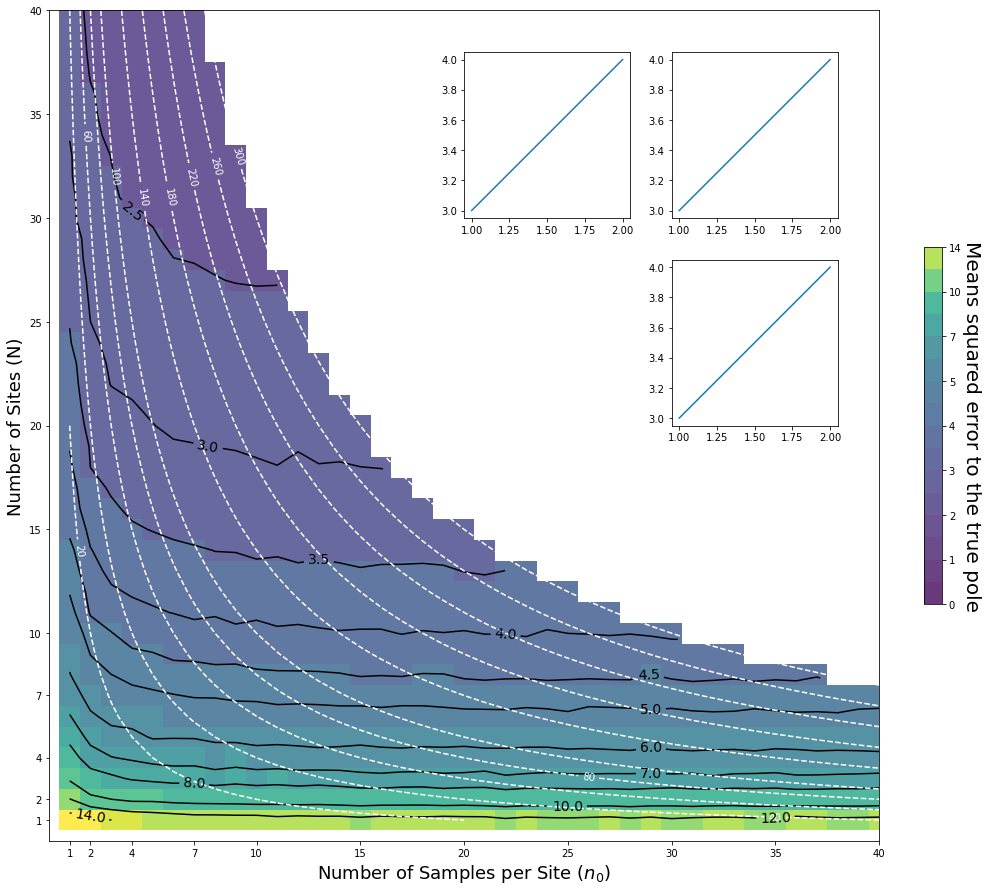

In [15]:
contour_from_pandas(df_filter.pivot('n', 'k', 'error_angle_mean'))

In [19]:
df_filter.pivot('n', 'k', 'error_angle_mean')

k,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
n,,,,,,,,,,,,,,,,,,,,
1,16.865130,14.640657,13.885148,13.418216,13.279421,13.165494,13.015631,12.912040,12.725751,12.713800,12.668303,12.696832,12.487028,12.769889,12.605099,12.576401,12.598964,12.660184,12.482800,12.460307
2,11.816965,10.481055,9.926199,9.748940,9.430369,9.315650,9.315816,9.092806,9.091217,9.170408,9.105799,8.937305,9.009120,8.963548,8.963229,8.900262,9.006610,8.860400,8.829726,8.985067
3,9.953802,8.681712,8.253188,7.832209,7.716427,7.635321,7.607945,7.478734,7.443366,7.474344,7.417132,7.392532,7.363124,7.241014,7.271018,7.258658,7.244396,7.262997,7.279117,7.334527
4,8.509390,7.440150,7.003854,6.825436,6.749933,6.551312,6.574874,6.478378,6.493617,6.439397,6.383834,6.400279,6.391842,6.337337,6.353112,6.337951,6.319680,6.331093,6.245148,6.335987
5,7.790800,6.605127,6.299104,6.049306,6.001164,6.026490,5.811929,5.838687,5.800890,5.796036,5.726331,5.764604,5.742595,5.681027,5.724121,5.725069,5.647621,5.658791,5.632682,5.676813
6,6.980263,6.083045,5.712073,5.589094,5.487472,5.367805,5.359627,5.389932,5.327195,5.228777,5.181608,5.248790,5.171961,5.245324,5.254903,5.270493,5.141807,5.148665,5.093277,5.189054
7,6.547019,5.638125,5.366393,5.276756,5.027256,4.999276,4.968051,4.891777,4.862384,4.898947,4.856009,4.860368,4.855167,4.750305,4.812377,4.741255,4.754636,4.722697,4.719594,4.764715
8,6.102020,5.277569,5.016052,4.877870,4.790710,4.661576,4.676922,4.621295,4.613635,4.523600,4.556045,4.513141,4.520954,4.502309,4.496701,4.497530,4.411037,4.472169,4.476336,4.488695
9,5.755437,4.975836,4.770335,4.611322,4.486313,4.394262,4.382742,4.303140,4.337737,4.315468,4.297434,4.310992,4.286053,4.219091,4.253582,4.261340,4.267609,4.239215,4.270323,4.242597


In [9]:
df

,Unnamed: 0,error_angle_mean,error_angle_median,error_angle_95,error_angle_std,n_tot,n,k,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers
0,0,5.478378,5.052157,10.473486,2.841901,50,10,5,10.0,30.0,0.0,0.0,G,NaN,False
1,0,9.845460,8.901229,20.233075,5.400017,30,2,15,10.0,30.0,0.0,0.0,G,NaN,False
2,0,4.660446,4.385503,9.352260,2.509815,52,26,2,10.0,30.0,0.0,0.0,G,NaN,False
3,0,5.763941,5.335504,11.412674,2.990118,63,7,9,10.0,30.0,0.0,0.0,G,NaN,False
4,0,3.628890,3.337021,7.228424,1.919778,96,32,3,10.0,30.0,0.0,0.0,G,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,4.039788,3.830901,7.805328,2.072878,84,21,4,10.0,30.0,0.0,0.0,G,NaN,False
280,0,7.741497,7.175882,15.312474,4.289837,17,17,1,10.0,30.0,0.0,0.0,G,NaN,False
281,0,6.625793,6.140469,13.276967,3.670740,24,12,2,10.0,30.0,0.0,0.0,G,NaN,False
282,0,4.096986,3.848325,8.156520,2.176011,90,18,5,10.0,30.0,0.0,0.0,G,NaN,False
